### Helpful resources:
* [Guide to Markdown](https://paperhive.org/help/markdown)
* [Guide to LaTeX Math symbols](http://tug.ctan.org/info/undergradmath/undergradmath.pdf)
* [Python Cheat Sheets](https://ehmatthes.github.io/pcc/cheatsheets/README.html)
* [Moving to Python from MATLAB](https://bastibe.de/2013-01-20-a-python-primer-for-matlab-users.html)

### Template for lab report:
* **Title:** Name the lab that this report is for
* **Collaborators:** Team work on labs is encouraged, but everyone is required to turn in their own lab report. Please list your collaborators in the intro to the report.
* **Goal and Introduction:** Add a brief description of the goal and background knowledge for the lab. This can be drawn from the lab description, but should be in your own words.
* **Data:** List the datasets used, what they describe and any quality/pre-processing before analysis.
* **Approach and Results:** Describe your approach for each question in the lab description and interpretation of the results for that question.
* **Conclusions:** Synthesize the conclusions from your results section here. Give overarching conclusions. Tell us what you learned.
* **References:** Cite any resources or publications you used.
---
# Final Project
### Elise Segal, Daniel Heilmen, Natalie Giovi, Percy Slattery

## Goal and Introduction
Add a brief description of the goal and background knowledge for the lab. This can be drawn from the lab description, but should be in your own words.

## Data
List the datasets used, what they describe and any quality/pre-processing before analysis.

----
## Approach and Results
Describe your approach for each question in the lab description and interpretation of the results for that question.
Start with an over-arching paragraph to describe your approach as you see fit.

In [1]:
# imports the libraries needed for the project
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# time converter to datetime object for the OMNI data
tconvert = lambda x: dt.datetime.strptime(str(x), '%Y-%m-%dT%H:%M:%S.%fZ')
# reads the OMNI data into arrays
data = np.genfromtxt('OMNI2_20002024.csv', names=True, delimiter=',', skip_header=97, encoding='utf-8',converters={0:tconvert}, dtype=None)

time = data['TIME_AT_CENTER_OF_HOUR_yyyymmddThhmmsssssZ']
swavgB = np.array(data['1AU_IP_MAG_AVG_B_nT'], dtype = float)
swvelocity = np.array(data['1AU_IP_PLASMA_SPEED_Kms'], dtype = float)
swpressure = np.array(data['1AU_IP_FLOW_PRESSURE_nPa'], dtype = float)
swtemp = np.array(data ['1AU_IP_PLASMA_TEMP_Deg_K'], dtype = float)
swdensity = np.array(data['1AU_IP_N_ION_Per_cc'], dtype = float)
dst = np.array(data['1H_DST_nT'], dtype = float)

In [2]:
# values that need to be filtered due to null data points
arrays = [swavgB, swdensity, swvelocity, swpressure, swtemp]
# maxs of the legitimate from OMNI
filters = [99, 999, 9999, 99, 9999999]
# filters out non data points to be null
for array, threshold in zip(arrays, filters):
    for index, value in enumerate(array):
        if value >= threshold:
            array[index] = np.nan

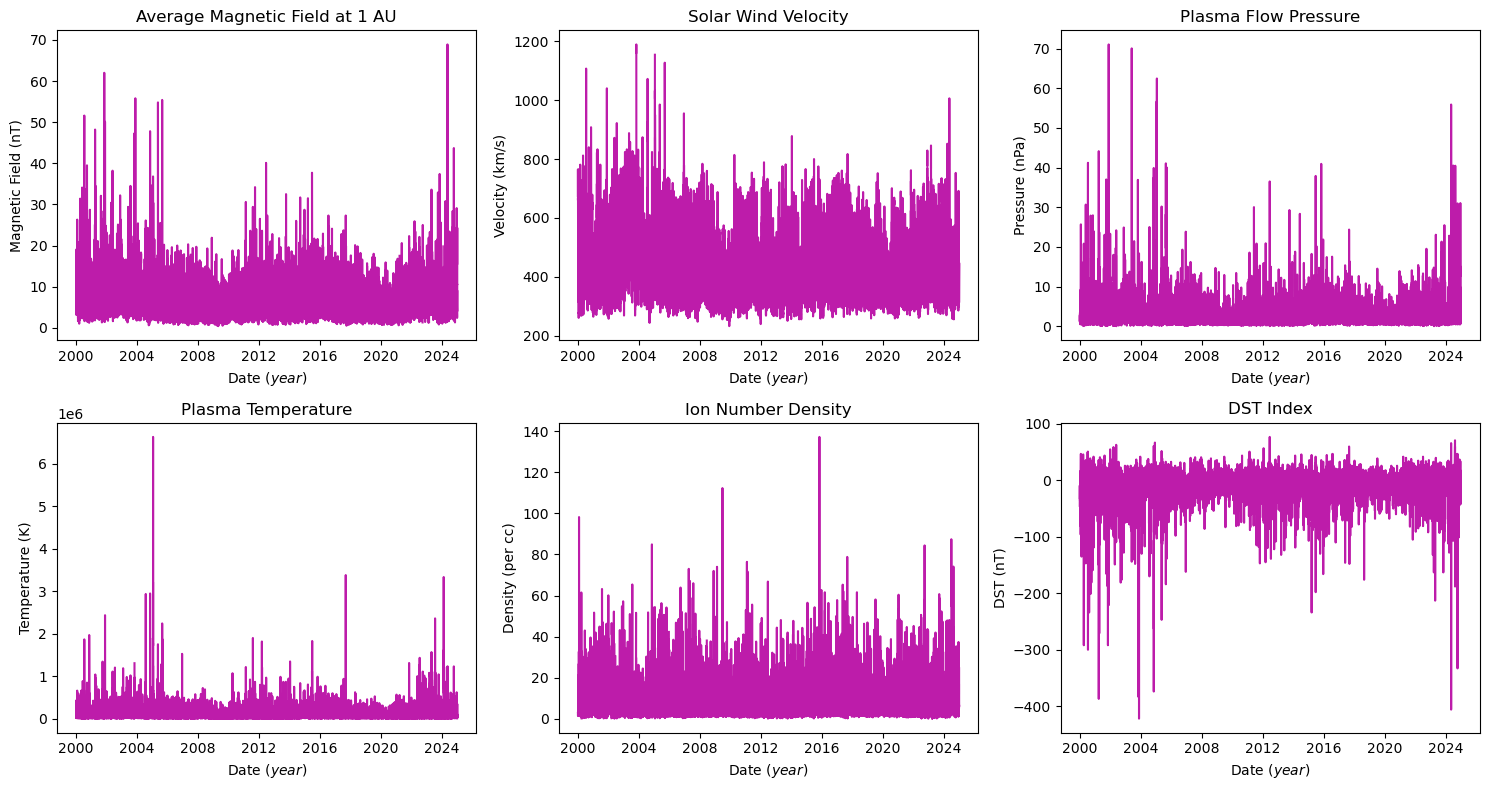

In [3]:
# correlates data to labels
data = {'Average Magnetic Field at 1 AU|Magnetic Field (nT)': (time,swavgB),
        'Solar Wind Velocity|Velocity (km/s)': (time,swvelocity),
        'Plasma Flow Pressure|Pressure (nPa)': (time,swpressure),
        'Plasma Temperature|Temperature (K)': (time,swtemp),
        'Ion Number Density|Density (per cc)': (time,swdensity),
        'DST Index|DST (nT)': (time,dst)}
fig, axes = plt.subplots(2,3, figsize = (15,8))
# for loop to add data to each plot
for ax, (label, (x, y)) in zip(axes.flat, data.items()):
    #add data to the plot
    ax.plot(x,y, color = '#bd1caa')
    # adds proper titles and labels
    title, space, ytext = label.partition('|')
    ax.set_title(title)   
    ax.set_xlabel(r'Date $(year)$')
    ax.set_ylabel(ytext)
fig.tight_layout()

Between 2019 and 2022 most of the data is consistent, showing low solar activity. The end of the data specifically around 2024 shows a lot of variety demostrating higher solar activy aligning with the solar cycle with solar min in 2019 and solar max in 2024.

While the most notable solar event from the plots is the May 2024 storm it is not the best example to show how solar wind parameters behave during a CME. This is because the May 2024 storm is the result of a cannibal CME which means that there were several CMEs that were back to back only a few hours apart. Therefore we decided to go with the April 23rd storm which was the result on a single CME to showcase how solar wind changes during a solar event. 

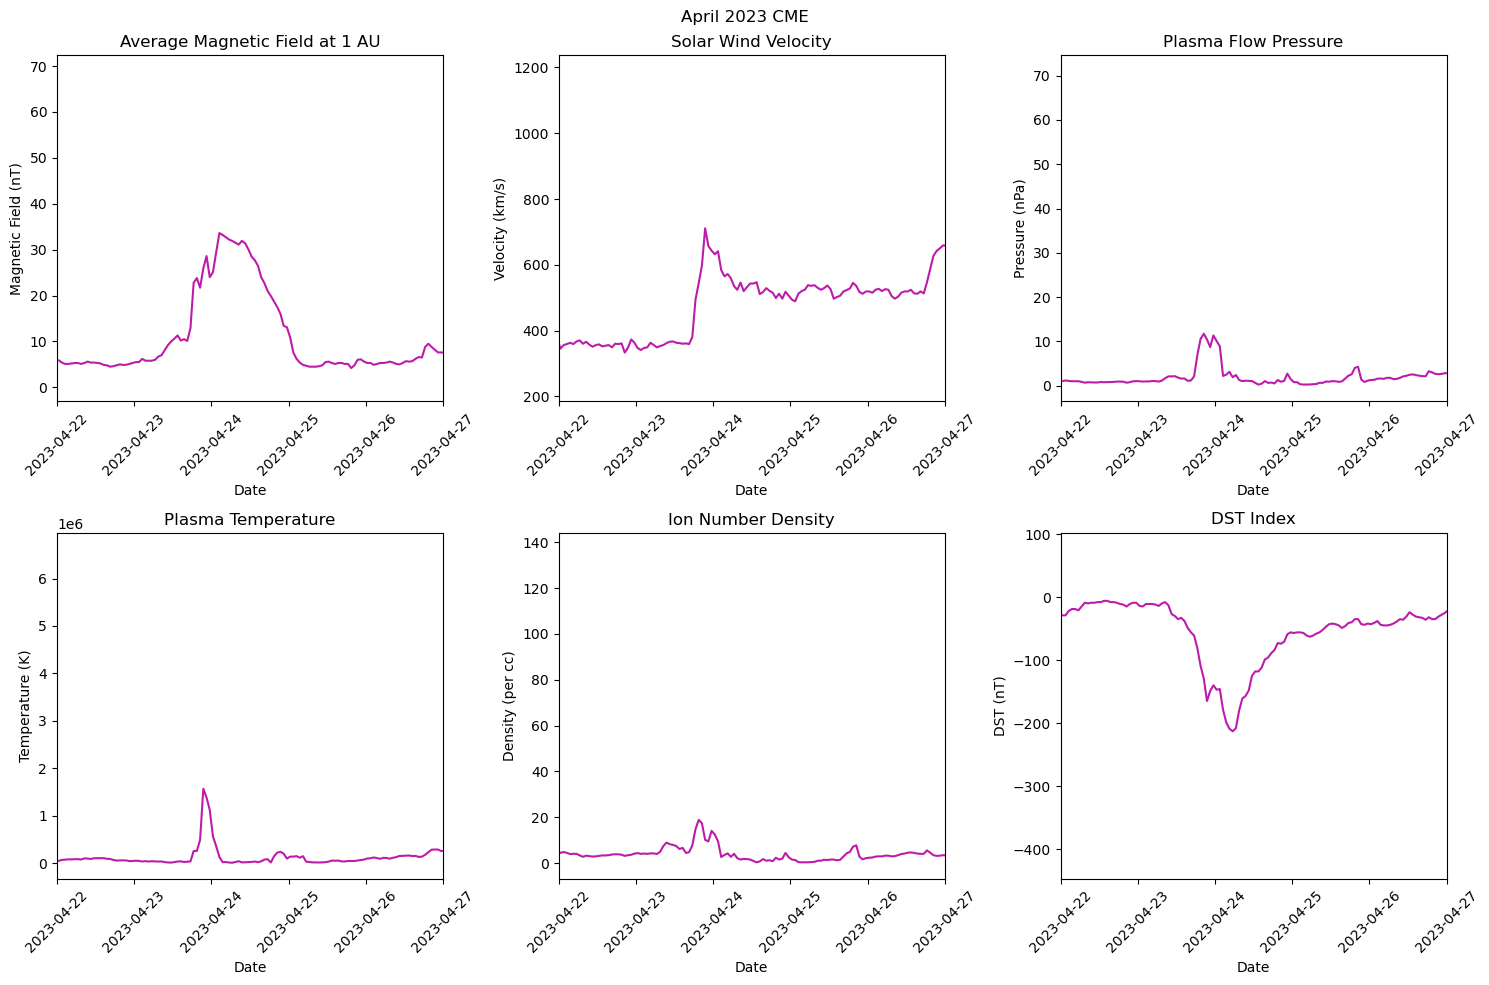

In [4]:
# creates a new figure for plots
fig, axes = plt.subplots(2,3, figsize = (15,10))
fig.suptitle('April 2023 CME')
# for loop to add data to each plot
for ax, (label, (x, y)) in zip(axes.flat, data.items()):
    # add data to the plot
    # narrows graph to just time around the 4/23/2023 CME
    ax.set_xlim(dt.datetime(2023,4,22),dt.datetime(2023,4,27))
    ax.plot(x,y, color = '#bd1caa')
    # adds proper titles and labels
    title, space, ytext = label.partition('|')
    ax.set_title(title)   
    ax.set_xlabel('Date')
    ax.set_ylabel(ytext)
    ax.tick_params(axis='x', rotation=45)
fig.tight_layout()

During a CME the magnetic field at 1 AU increases at the arrival of the CME and conitnues to increase before decreasing after the passing of the CME. The solar wind velocity also increases when the storm arrives before decreasing slightly again and remaining steady. There is a small peak in the solar wind pressure, density and temperature at the arrival of the CME before it decreases again. Lastly, the DST Index decreases to negative during the CME before recovering. This behavior matches the the structure of a CME. Typically a CME will have a shock associated with where the fast solar wind from the CME over takes the slow solar wind in front forming the shock. However, there does not have to be a shock associated with the CME. This causes an increase in solar wind speed when the shock and CME reach Lagrange point 1. Since the shock is at the beginning there is a bigger increase at the start of the CME before decreasing a little while the magnetic cloud of the CME passes. In the magnetic cloud of a CME there is a magnetic field as the name suggests. However the magnetic cloud mainly contains the magnetic cloud and nothing else. Therefore, the magnetic field should increase at the arrival of the shock and continue to increase and stay at a higher value during the passing of the magnetic cloud. However the solar wind parameter should increase at the arrival of the shock due to the compression of the solar wind but then drop during the passing of the magnetic cloud which is seen with the April 23rd storm of 2023. Lastly the DST measures the impact of the magnetic field on Earth surface with Earth's magnetic field therefore is showcases the opposite effect of Lagrange point 1 by decreasing due to the CME before recovering back to around 0 nT.

In [5]:
from scipy.fftpack import fft, ifft, fftfreq
from scipy.signal import butter, filtfilt
import numpy as np
import matplotlib.pyplot as plt

# Helper function: interpolate missing (NaN) values in the time series using linear interpolation
def interpolate_nan(y):
    nans = np.isnan(y)                          # Identify NaN positions
    not_nans = ~nans                            # Identify valid (non-NaN) positions
    x = np.arange(len(y))                       # Create an index array
    y[nans] = np.interp(x[nans], x[not_nans], y[not_nans])  # Interpolate NaNs
    return y

def analyze_fft(data, dt_hours=1, top_k=6):
    # Interpolate NaNs and prepare data
    y = interpolate_nan(data.copy())
    dt_days = dt_hours / 24
    n = len(y)
    
    #gets ftt
    data_fft = fft(y)/y.size # Normalize it
    freqs = fftfreq(y.size, 1/24) # hours per day

    power = np.abs(data_fft[1:y.size//2]**2) # Get that power
    freq = freqs[1:y.size//2] # This is cycles-per-day.

    # Filter to only positive frequencies
    pos_mask = freq > 0
    pos_freq = freq[pos_mask]
    pos_power = power[pos_mask]
    pos_indices = np.where(pos_mask)[0]

    # Get top-k harmonics
    harmonics = []
    for _ in range(top_k):
        idx_in_pos = np.argmax(pos_power)
        global_idx = pos_indices[idx_in_pos]
        harmonic = {
            'amplitude': power[global_idx],
            'frequency': freq[global_idx],
            'period_days': 1 / freq[global_idx],
            'harmonic_index': global_idx
        }
        harmonics.append(harmonic)
        pos_power[idx_in_pos] = 0  # Remove this peak

    return freq, power, n, harmonics

def sort_harmonics_amp(harmonics):
    sorted_h = sorted(harmonics, key=lambda h: h['amplitude'], reverse=True)
    return sorted_h


Average Magnetic Field at 1 AU:
	 1 Dominant frequency: 0.0002 cycles per day (~4566.00 days or ~12.5096 years)
	 2 Dominant frequency: 0.0001 cycles per day (~9132.00 days or ~25.0192 years)
	 3 Dominant frequency: 0.0002 cycles per day (~4566.00 days or ~12.5096 years)
	 4 Dominant frequency: 0.1107 cycles per day (~9.03 days or ~0.0247 years)
	 5 Dominant frequency: 0.0005 cycles per day (~1826.40 days or ~5.0038 years)

Solar Wind Velocity:
	 1 Dominant frequency: 0.0002 cycles per day (~4566.00 days or ~12.5096 years)
	 2 Dominant frequency: 0.0001 cycles per day (~9132.00 days or ~25.0192 years)
	 3 Dominant frequency: 0.0002 cycles per day (~4566.00 days or ~12.5096 years)
	 4 Dominant frequency: 0.0371 cycles per day (~26.94 days or ~0.0738 years)
	 5 Dominant frequency: 0.0002 cycles per day (~4566.00 days or ~12.5096 years)

Plasma Flow Pressure:
	 1 Dominant frequency: 0.0002 cycles per day (~4566.00 days or ~12.5096 years)
	 2 Dominant frequency: 0.0001 cycles per day (~91

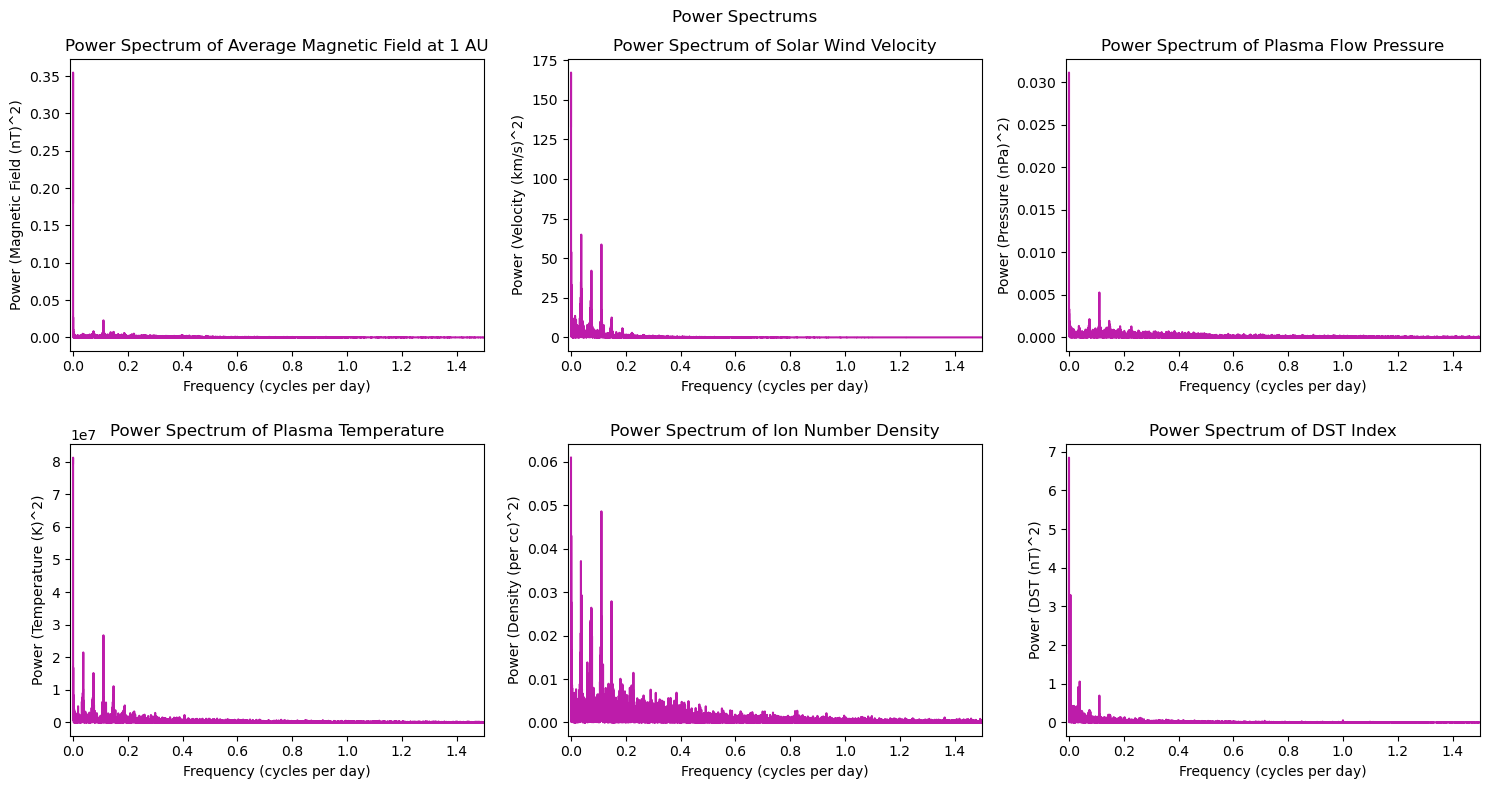

In [6]:
#correlates data with labels
data = {'Average Magnetic Field at 1 AU|Magnetic Field (nT)': (time,swavgB),
        'Solar Wind Velocity|Velocity (km/s)': (time,swvelocity),
        'Plasma Flow Pressure|Pressure (nPa)': (time,swpressure),
        'Plasma Temperature|Temperature (K)': (time,swtemp),
        'Ion Number Density|Density (per cc)': (time,swdensity),
        'DST Index|DST (nT)': (time,dst)}

fig, axes = plt.subplots(2,3, figsize = (15,8))
# for loop to add data to each plot
fig.suptitle('Power Spectrums')

dom_amps = []
dom_freqs = []

for ax, (label, (x, i)) in zip(axes.flat, data.items()):
    freq, power, n, harmonics = analyze_fft(i)
    sorted_amps = sort_harmonics_amp(harmonics)
    #add data to the plot
    ax.plot(freq[:n//2], power[:n//2], color = '#bd1caa')
    # adds proper titles and labels
    title, space, unit = label.partition('|')
    ax.set_title(f'Power Spectrum of {title}')   
    ax.set_xlabel("Frequency (cycles per day)")
    ax.set_ylabel(f"Power ({unit}^2)")
    ax.set_xlim(-0.01,1.5)

    freq = abs(freq)

    dominant_frequencies = []

    # Loop to find the top 5 dominant frequencies
    for i in range(5):
        # Find the index of the dominant frequency (maximum power) within the valid range
        dominant_idx = np.argmax(power)
        dom_amps.append(np.sqrt(power[dominant_idx]))
        # Extract the dominant frequency in cycles/day
        dominant_freq = freq[dominant_idx]
        dom_freqs.append(dominant_freq)
        # add to array
        dominant_frequencies.append(dominant_freq)
        # delete max power to find second dominant frequency
        power = np.delete(power, dominant_idx)  

    # Print the results
    print(f'\n{title}:')
    for rank, freq in enumerate(dominant_frequencies, start=1):
        days = 1 / freq
        years = days / 365
        print(f'\t {rank} Dominant frequency: {freq:.4f} cycles per day (~{days:.2f} days or ~{years:.4f} years)')


fig.tight_layout()

In [7]:
# original data arrays
arrays = [swavgB, swdensity, swvelocity, swpressure, swtemp, dst]
# new arrays for the filtered data
swavgB_filt = np.empty(swavgB.size)
swdensity_filt = np.empty(swdensity.size)
swvelocity_filt = np.empty(swvelocity.size)
swpressure_filt = np.empty(swpressure.size)
swtemp_filt = np.empty(swtemp.size)
dst_filt = np.empty(dst.size)

freq_ranged = 5/365
freq_rangey = 62/365

print(dom_freqs[0])
print(dom_freqs[12])
print(dom_freqs[13])

newarray = [swavgB_filt, swdensity_filt, swvelocity_filt, swpressure_filt, swtemp_filt, dst_filt]
# use ifft to filter out dominant frequencies found above
for i in range(6):
    x = interpolate_nan(arrays[i])
    N = x.size
    amps = fft(x)
    freqs = fftfreq(N, 1/24)

    mask1 = (np.abs(freqs) < dom_freqs[0]+freq_rangey) & (np.abs(freqs) > dom_freqs[0]-freq_rangey) & (freqs != 0)
    mask2 = (np.abs(freqs) < dom_freqs[12]+freq_ranged) & (np.abs(freqs) > dom_freqs[12]-freq_ranged) & (freqs != 0)  
    mask3 = (np.abs(freqs) < dom_freqs[13]+freq_ranged) & (np.abs(freqs) > dom_freqs[13]-freq_ranged) & (freqs != 0) 

    amps_filt = amps.copy()
    amps_filt[mask1]=0
    amps_filt[mask2]=0
    amps_filt[mask3]=0
    newarray[i] = ifft(amps_filt)

swavgB_filt = newarray[0]
swdensity_filt = newarray[1]
swvelocity_filt = newarray[2]
swpressure_filt = newarray[3]
swtemp_filt = newarray[4]
dst_filt = newarray[5]

0.0002190100744634253
0.11081909767849321
0.000657030223390276


/Users/danielheilman/anaconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


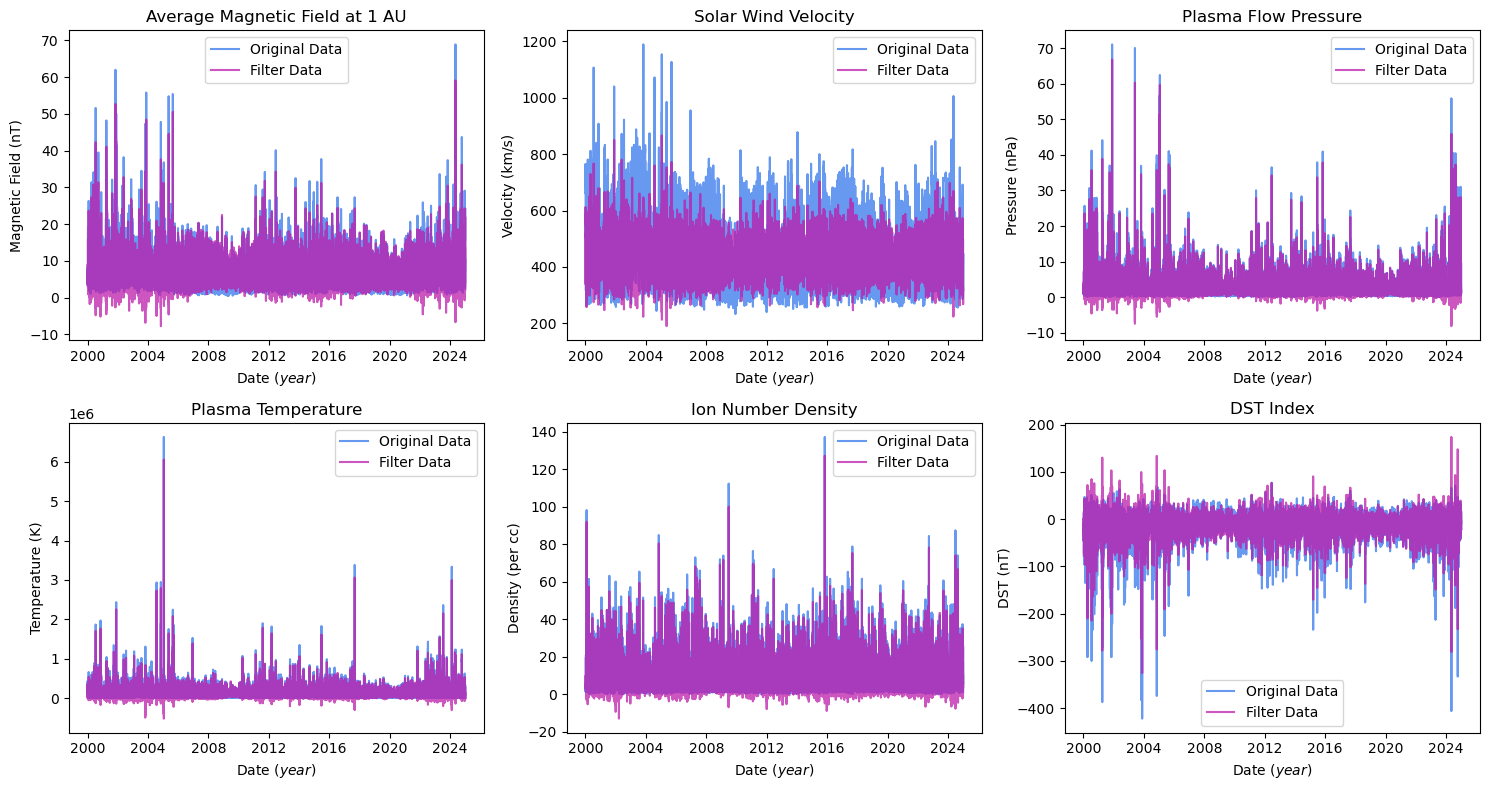

In [8]:
# correlates data to labels
data = {'Average Magnetic Field at 1 AU|Magnetic Field (nT)': (time,swavgB,swavgB_filt),
        'Solar Wind Velocity|Velocity (km/s)': (time,swvelocity,swvelocity_filt),
        'Plasma Flow Pressure|Pressure (nPa)': (time,swpressure,swpressure_filt),
        'Plasma Temperature|Temperature (K)': (time,swtemp,swtemp_filt),
        'Ion Number Density|Density (per cc)': (time,swdensity,swdensity_filt),
        'DST Index|DST (nT)': (time,dst,dst_filt)}
fig, axes = plt.subplots(2,3, figsize = (15,8))
# for loop to add data to each plot
for ax, (label, (x, y,filt)) in zip(axes.flat, data.items()):
    #add data to the plot
    ax.plot(x,y, label = 'Original Data', color = '#3477eb',alpha = 0.75)
    ax.plot(x, filt, label = 'Filter Data', color = '#bd1caa', alpha = 0.75)
    # adds proper titles and labels
    title, space, ytext = label.partition('|')
    ax.set_title(title)   
    ax.set_xlabel(r'Date $(year)$')
    ax.set_ylabel(ytext)
    ax.legend()
fig.tight_layout()

### Identifying DST Events 2.0

In [9]:
from dateutil.relativedelta import relativedelta
from datetime import timedelta
import math as math

In [10]:
#every hour
dst_events = np.zeros(len(dst))
for i in range(len(dst)):
    if(dst[i] < -70):
        dst_events[i] = True

In [11]:
#Here we will create an array to hold our true/false values
def calc_dst_binary(window_size, cutoff):
    '''Creates a true or false array for whether or 
    not a dst event exists in each time interval
    window is the window size in days
    cutoff is the dst index below which we count an event, in units of nano-Teslas

    Returns: binary event T/F array for dst data
    '''
    dst_binary = np.zeros(math.ceil(len(time) / (window_size * 24)))
    window = timedelta(days=window_size)
    start, stop = time[0], time[-1]
    idx = 0
    while start + window < stop:
        end = start + window
        locations = (time >= start) & (time < end)
        subset = dst[locations]
        if(np.min(subset) < cutoff):
            dst_binary[idx] = True
        start += window
        idx += 1
    return dst_binary

### Identifying Events in the Filtered Solar Wind

In [12]:
swEvent = np.empty(swavgB_filt.size)

for i in range(swavgB_filt.size):
    c = 0
    if swavgB_filt[i] > 15:
        c = c+1
    if swdensity_filt[i] > 15:
        c = c+1
    if swpressure_filt[i] > 10:
        c = c+1
    if swtemp_filt[i] > 7.5*10**5:
        c = c+1
    if swvelocity_filt[i] > 550:
        c = c+1
    if c >=3:
        swEvent[i] = True
    else:
        swEvent[i] = False

In [13]:
#here we will perform our binary event analysis on the Solar Wind data starting with the same cutoffs as chosen above
#this time however, we will us a while loop and datetime objects to retrieve 5 day time intervals instead of
#checking each data point individually
#Here we will create an array to hold our true
def calc_sw_binary(window_size, cutoffs):
    '''Creates a true or false array for whether or 
    not a sw event exists in each time interval
    window is the window size in days
    cutoffs is an array that gives the cutoffs for each variable
    [swavgB_filt, swdensity_filt, swpressure_filt, swtemp_filt, swvelocity_filt]

    Returns: binary event T/F array for sw data
    '''
    sw_binary = np.zeros(math.ceil(len(time) / (window_size * 24)))
    window = timedelta(days=window_size)
    start, stop = time[0], time[-1]
    idx = 0
    while start + window < stop:
        end = start + window
        locations = (time >= start) & (time < end)
        c = 0
        if np.max(swavgB_filt[locations]) > cutoffs[0]:
            c = c+1
        if np.max(swdensity_filt[locations]) > cutoffs[1]:
            c = c+1
        if np.max(swpressure_filt[locations]) > cutoffs[2]:
            c = c+1
        if np.max(swtemp_filt[locations]) > cutoffs[3]:
            c = c+1
        if np.max(swvelocity_filt[locations]) > cutoffs[4]:
            c = c+1
        if c >=3:
            sw_binary[idx] = True
        else:
            sw_binary[idx] = False
        start += window
        idx += 1
    return sw_binary

In [14]:
#calculate the T/F array for events in the dst data
window_size = 5 #days
cutoff = -70 #nT
dst_binary = calc_dst_binary(window_size, cutoff)

In [15]:
#calculate the T/F array for events in the sw data
cutoffs = [15, 15, 10, 7.5*10**5, 550]
sw_binary = calc_sw_binary(window_size, cutoffs)

Total event idendified from solar wind data: 307


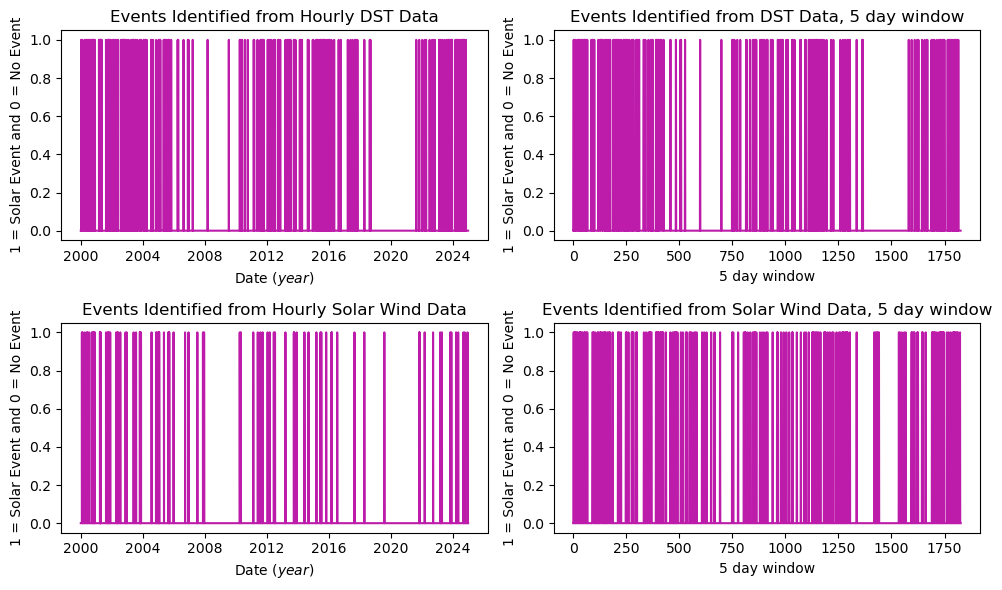

In [16]:
#create figure and suplots to plot results
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2, figsize=(10, 6))
#dst events by hour
ax1.plot(time, dst_events, color = '#bd1caa')
#dst events 5 day window
ax2.plot(dst_binary, color = '#bd1caa')
#solar wind events by hour
ax3.plot(time, swEvent, color = '#bd1caa')
#solar wind events 5 day window
ax4.plot(sw_binary, color = '#bd1caa')
# adds proper titles and labels
ax1.set_title('Events Identified from Hourly DST Data')   
ax1.set_xlabel(r'Date $(year)$')
ax1.set_ylabel('1 = Solar Event and 0 = No Event')

ax2.set_title('Events Identified from DST Data, 5 day window')   
ax2.set_xlabel('5 day window')
ax2.set_ylabel('1 = Solar Event and 0 = No Event')

ax3.set_title('Events Identified from Hourly Solar Wind Data')   
ax3.set_xlabel(r'Date $(year)$')
ax3.set_ylabel('1 = Solar Event and 0 = No Event')

ax4.set_title('Events Identified from Solar Wind Data, 5 day window')   
ax4.set_xlabel('5 day window')
ax4.set_ylabel('1 = Solar Event and 0 = No Event')
print(f'Total event idendified from solar wind data: {int(np.sum(swEvent))}')

fig.tight_layout()

### Question 1
Write a function to read the *.csv files using numpy.genfromtxt. Leverage the example above to ensure success.


In [ ]:
### Question 3
#Description of what you need to do and interpretation of results (if applicable)
## here is binary event anaylsis on two lists that we can edit later --- just wanted to have something before wed
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



def binary_event_analysis(list1, list2):
    """
    Analyzes two binary event lists.
    
    Parameters:
    - list1, list2: Lists of binary values of equal length.
    
    This function computes:
      - A contingency table for the two lists.
      - The phi coefficient (correlation).
      - The odds ratio.
      - The hit rate, false alarm rate, proportion correct, and false alarm ratio.
      - The Heidke Skill Score (HSS) for forecast skill.
      - Chi-square test for independence.
    """
    # Inputs are of equal length
    if len(list1) != len(list2):
        raise ValueError("Both lists must have the same length.")
    
    # Construct the contingency table elements
    # a: True Positives, b: False Alarms, c: Misses, d: True Negatives.
    a = sum(1 for i, j in zip(list1, list2) if i == 1 and j == 1)
    b = sum(1 for i, j in zip(list1, list2) if i == 1 and j == 0)
    c = sum(1 for i, j in zip(list1, list2) if i == 0 and j == 1)
    d = sum(1 for i, j in zip(list1, list2) if i == 0 and j == 0)
    
    contingency_table = np.array([[a, b],
                                  [c, d]])
    
    # Total number of observations
    N = a + b + c + d
    # Print contingency table
    print("Contingency Table:")
    print("                list2=1   list2=0")
    print(f"list1=1        {a:<9} {b}")
    print(f"list1=0        {c:<9} {d}\n")
    
    # Compute phi coefficient
    numerator = a * d - b * c
    denominator = np.sqrt((a + b) * (c + d) * (a + c) * (b + d))
    phi = numerator / denominator if denominator != 0 else np.nan
    print(f"Phi coefficient (correlation): {phi:.4f}")
    
    # Calculate Odds Ratio
    if b * c == 0:
        odds_ratio = np.inf if a * d > 0 else np.nan
        print("Odds Ratio: Division by zero occurred (one of b or c is 0); odds ratio set to infinity if numerator > 0.")
    else:
        odds_ratio = (a * d) / (b * c)
        print(f"Odds Ratio: {odds_ratio:.4f}")
    
    # Calculate additional performance metrics
    # Hit Rate: Proportion of actual positive events (list2) that were correctly forecast
    hit_rate = a / (a + c) if (a + c) != 0 else np.nan
    # False Alarm Rate: Proportion of actual negative events (list2) that were falsely forecast as positive.
    false_alarm_rate = b / (b + d) if (b + d) != 0 else np.nan
    # Proportion Correct: Overall accuracy
    proportion_correct = (a + d) / N if N != 0 else np.nan
    # False Alarm Ratio: Proportion of forecasted positives that were false alarms
    false_alarm_ratio = b / (a + b) if (a + b) != 0 else np.nan

    precision = (a) / (a + b) if (a) != 0 else np.nan
    recall = (a) / (a + c) if (a) != 0 else np.non
    
    print(f"\nHit Rate (True Positive Rate): {hit_rate:.4f}")
    print(f"False Alarm Rate: {false_alarm_rate:.4f}")
    print(f"Proportion Correct (Overall Accuracy): {proportion_correct:.4f}")
    print(f"False Alarm Ratio: {false_alarm_ratio:.4f}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")

    # Calculate Heidke Skill Score (HSS)
    # Expected accuracy by chance
    Pe = ((a + b) * (a + c) + (c + d) * (b + d)) / (N * N) if N != 0 else np.nan
    # HSS: (observed accuracy - expected accuracy) / (1 - expected accuracy)
    HSS = (proportion_correct - Pe) / (1 - Pe) if (1 - Pe) != 0 else np.nan
    print(f"Heidke Skill Score: {HSS:.4f}")
    

    plt.figure(figsize=(6, 4))
    
    plt.imshow(contingency_table, cmap="RdPu", vmin=0, vmax=200)

    #adding a colorbar to display the mapping of colors to numerical values.
    plt.colorbar()

    plt.title('Map of Confusion Matrix')
    plt.xlabel('Observed Values')
    plt.ylabel('Forecasted Values')

    plt.xticks(ticks=[0, 1], labels=['1', '0'])
    plt.yticks(ticks=[0, 1], labels=['1', '0'])

    #get the numeric values
    for i in range(contingency_table.shape[0]):
        for j in range(contingency_table.shape[1]):
            plt.text(j, i, str(contingency_table[i, j]),
                     ha="center", va="center", color="black")

    plt.show()

    #
    return contingency_table, phi, odds_ratio, hit_rate, false_alarm_rate, proportion_correct, false_alarm_ratio, HSS, precision, recall


Contingency Table:
                list2=1   list2=0
list1=1        109       141
list1=0        113       1464

Phi coefficient (correlation): 0.3833
Odds Ratio: 10.0154

Hit Rate (True Positive Rate): 0.4910
False Alarm Rate: 0.0879
Proportion Correct (Overall Accuracy): 0.8610
False Alarm Ratio: 0.5640
Precision: 0.436
Recall: 0.49099099099099097
Heidke Skill Score: 0.3824


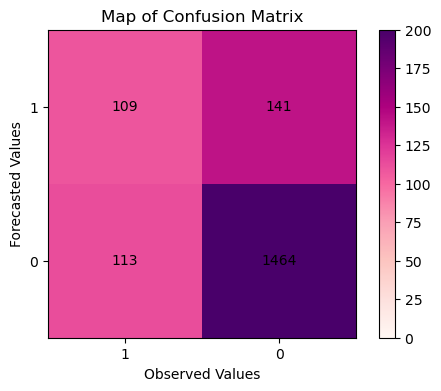


 yay!  we have some stats! *high five*


In [24]:
#try out the binary analysis function, natalie please feel free to fix this part up and do it properly later!
binary_event_analysis(dst_binary, sw_binary)
print('\n yay!  we have some stats! *high five*')

In [26]:
print(cutoffs)

[15, 15, 10, 750000.0, 550]


Contingency Table:
                list2=1   list2=0
list1=1        213       176
list1=0        871       7872

Phi coefficient (correlation): 0.2797
Odds Ratio: 10.9379

Hit Rate (True Positive Rate): 0.1965
False Alarm Rate: 0.0219
Proportion Correct (Overall Accuracy): 0.8853
False Alarm Ratio: 0.4524
Precision: 0.5475578406169666
Recall: 0.19649446494464945
Heidke Skill Score: 0.2417


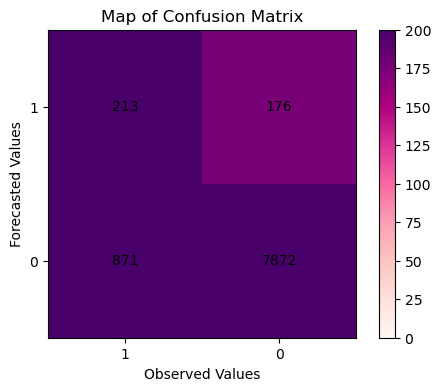

Contingency Table:
                list2=1   list2=0
list1=1        201       188
list1=0        759       7984

Phi coefficient (correlation): 0.2831
Odds Ratio: 11.2465

Hit Rate (True Positive Rate): 0.2094
False Alarm Rate: 0.0230
Proportion Correct (Overall Accuracy): 0.8963
False Alarm Ratio: 0.4833
Precision: 0.5167095115681234
Recall: 0.209375
Heidke Skill Score: 0.2527


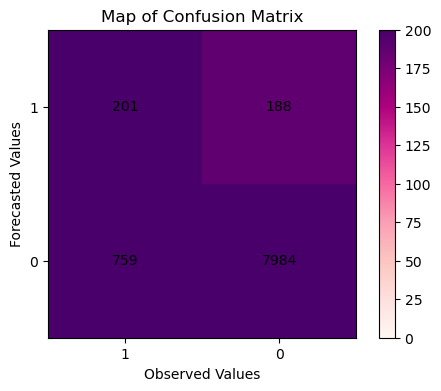

AttributeError: 'NoneType' object has no attribute 'append'

In [ ]:
window_sizes = [1, 5, 7]
dst_cutoffs = [-70, -150, -330]

swavgB_cutoffs = [10, 15, 20]
swdensity_cutoffs = [10, 15, 20]
swpressure_cutoffs = [5, 10, 15]
swtemp_cutoffs = [5*10**5, 7.5*10**5, 10*10**5]
swvelocity_cutoffs = [500, 550, 600]

contingency_tables = []
phis = []
odds_ratios = []
hit_rates = []
false_alarm_rates = []
proportion_corrects= []
false_alarm_ratios = []
HSSs = []
precisions = []
recalls = []

for window_size in window_sizes:
    for dst_cutoff in dst_cutoffs:
        for avgB in swavgB_cutoffs:
            for density in swdensity_cutoffs:
                for pressure in swpressure_cutoffs:
                    for temp in swtemp_cutoffs:
                        for velocity in swvelocity_cutoffs:
                            cutoffs = [avgB, density, pressure, temp, velocity]
                            dst_binary0 = calc_dst_binary(window_size, dst_cutoff)
                            sw_binary0 = calc_sw_binary(window_size, cutoffs)
                            contingency_table, phi, odds_ratio, hit_rate, false_alarm_rate, proportion_correct, false_alarm_ratio, HSS, precision, recall = binary_event_analysis(dst_binary0, sw_binary0)
                            contingency_tables = contingency_tables.append(contingency_table)
                            phis.append(phi)
                            odds_ratios.append(odds_ratio)
                            hit_rates.append(hit_rate)
                            false_alarm_rates.append(false_alarm_rate)
                            HSSs.append(HSS)
                            precisions.append(precision)
                            recalls.append(recall)

'''for window_size in window_sizes:
    for dst_cutoff in dst_cutoffs:
        for avgB in swavgB_cutoffs:
            for density in swdensity_cutoffs:
                for pressure in swpressure_cutoffs:
                    for temp in swtemp_cutoffs:
                        for velocity in swvelocity_cutoffs:
                            cutoffs = [avgB, density, pressure, temp, velocity]
                            dst_binary0 = calc_dst_binary(window_size, dst_cutoff)
                            sw_binary0 = calc_sw_binary(window_size, cutoffs)
                            contingency_table, phi, odds_ratio, hit_rate, false_alarm_rate, proportion_correct, false_alarm_ratio, HSS, precision, recall = binary_event_analysis(dst_binary0, sw_binary0)
                            contingency_tables = contingency_tables.append(contingency_table)
                            phis.append(phi)
                            odds_ratios.append(odds_ratio)
                            hit_rates.append(hit_rate)
                            false_alarm_rates.append(false_alarm_rate)
                            HSSs.append(HSS)
                            precisions.append(precision)
                            recalls.append(recall)'''


>>>>>>> 1ae08bcd22831bb67a3e4a9b158ccb901410deab
## Conclusions
Synthesize the conclusions from your results section here. Give overarching conclusions. Tell us what you learned.
## References
List any references used
>>>>>>> Stashed changes:test.py